<img src="images/logoitam.gif">

# Maestría en Ciencia de Datos
## Clustering
* Machine Learning | 27 de octubre de 2016 |
* Alumnas: 
    - Gabriela Flores Bracamontes | Clave: 160124 |
    - Guillermina Montanari Luján | Clave: 101421 |
    - Paulina Salgado Figueroa    | Clave: 160314 |

### **Objetivo**:

Obtener el entendimiento del funcionamiento de las máquinas de soporte vectorial, utilizando la librería sklearn, mediante dos ejercicios:

1. Utilice el archivo andSVM.csv, y entrene un SVM, grafique los datos y la barrera de decisión; grafique el margen, las rectas que pasan por los vectores de soporte.

2. Determinar si los puntos en el plano se encuentran contenidos en un círculo mediante maquinas de soporte vectorial .

El criterio para determinar si el punto se encontraba o no dentro del círculo fue a través de la ecuación:
  
   $(x - h)^2 + (y - k)^2  <= r^2$

Donde los puntos (h,k) corresponden al centro del círculo y r es el radio.




  

In [217]:
# -*- coding: utf-8 -*-
import pandas
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy
import os
import random
import math
from heapq import merge
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import KNeighborsClassifier



In [24]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn import svm
from matplotlib import style
style.use("ggplot")

In [3]:
#Círculo
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
#Definimos los puntos contenidos dentro y fuera del circulo

radio=1

C1=np.asarray([0,0])
C2=np.asarray([2,2])
C3=np.asarray([0,2])

n_X1=100
n_X2=100
# Se define los puntos en el plano
X1=np.random.uniform(low=-0.9,high=0.9, size=(n_X1,2)) 
X2=np.random.uniform(low=1.1,high=2.9, size=(n_X2,2))
                      
#Se calculó la distancia del centro del ciculo C
P1=X1-C1
P2=X2-C2

cuadrado1=P1*P1
cuadrado2=P2*P2

suma_c1=cuadrado1.sum(axis=1)
suma_c2=cuadrado2.sum(axis=1)

#Se determina la distancia del centro al punto es mayo al di^metro, si es así el punto se encuentra fuera del circulo
Y1=np.where(suma_c1<=pow(radio,2),1.,0.)
Y2=np.where(suma_c2<=pow(radio,2),1.,0.)

Y1=Y1.reshape(n_X1, 1)
Y2=Y2.reshape(n_X2, 1)

X=np.append(X1,X2,axis=0)
Y=np.append(Y1,Y2,axis=0)
X_Y=np.append(X,Y,axis=1)



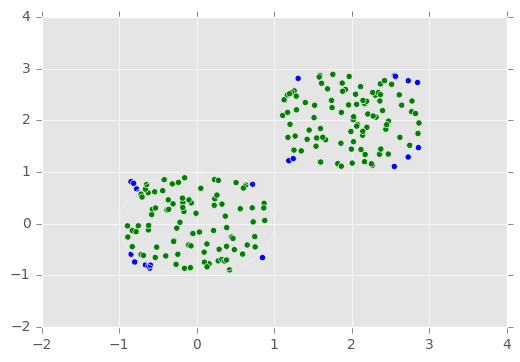

In [199]:
plt.scatter(X[:,0],X[:,1],c=['green' if i==1 else 'blue' for i in Y])
circle = plt.Circle(C1, radio,fill=False )
plt.gca().add_patch(circle)

##Maquinas de soporte vectorial

In [200]:
'''Kernel Gausiana'''
clf = svm.SVC(kernel='rbf', gamma=1)
clf.fit(X,Y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

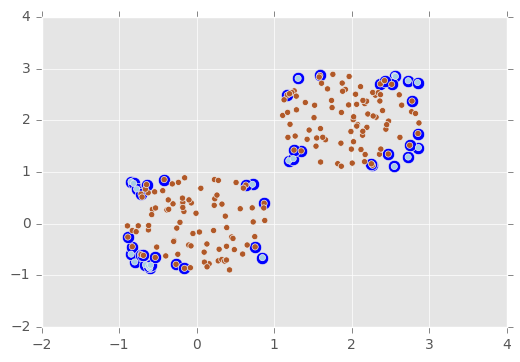

In [201]:

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
 s=80, facecolors='blue')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

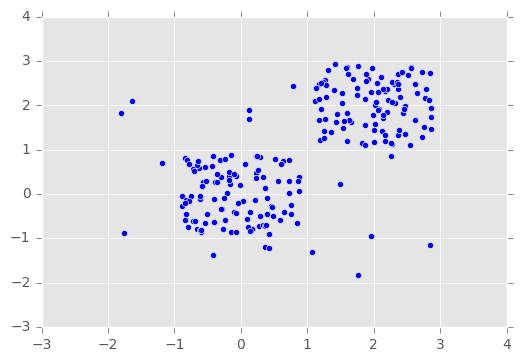

In [211]:
X3=np.random.uniform(low=-2,high=3,size=(20,2))
X_train=np.append(X,X3,axis=0)
plt.scatter(X_train[:,0],X_train[:,1])


In [212]:
#Procesamiento con K-means

n_cluster=2
km = KMeans(n_clusters=n_cluster,verbose=1)
km.fit(X_train)
labels = km.labels_
cluster_centers = km.cluster_centers_
y_train_cluster = km.predict(X_train)
#y_test_cluster = km.predict(X_test)


Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 174.297401271
start iteration
done sorting
end inner loop
Iteration 1, inertia 172.021506512
start iteration
done sorting
end inner loop
Iteration 2, inertia 172.021506512
center shift 0.000000e+00 within tolerance 1.441379e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 173.082927225
start iteration
done sorting
end inner loop
Iteration 1, inertia 172.021506512
start iteration
done sorting
end inner loop
Iteration 2, inertia 172.021506512
center shift 0.000000e+00 within tolerance 1.441379e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 172.41683998
start iteration
done sorting
end inner loop
Iteration 1, inertia 172.021506512
start iteration
done sorting
end inner loop
Iteration 2, inertia 172.021506512
center shift 0.000000e+00 within tolerance 1.441379e-04
Initialization complete
start iteration
done sorti

In [213]:
centroids = km.cluster_centers_
centroids

array([[-0.06203794, -0.0413047 ],
       [ 1.96009336,  2.041825  ]])

In [214]:
num_cluster_points = km.labels_.tolist()
y_train_cluster

k_means_labels = pairwise_distances_argmin(X_train, centroids)
k_means_labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

[]

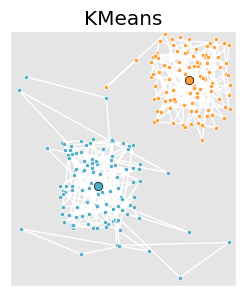

In [215]:
# KMeans
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_cluster), colors):
    my_members = k_means_labels == k
    cluster_center = km.cluster_centers_[k]
    ax.plot(X_train[my_members, 0], X_train[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
#plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
#    t_batch, k_means.inertia_))
